<a href="https://colab.research.google.com/github/dewipuspita0904/MembangunProyekMachineLearning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Your_Name_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset sumber: https://www.kaggle.com/datasets/krishnanshverma/academic-performance-of-university-student-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import Library Dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Clustering
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [ ]:
# Visualisasi tambahan
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Pengecekan apakah dataset tersedia sebelum membaca data
file_path = "/content/academic_performance_dataset_V2.csv"

if os.path.exists(file_path):
    data_df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
else:
    raise FileNotFoundError("Error: File dataset tidak ditemukan!")

Dataset berhasil dimuat!


In [ ]:
# Menampilkan 10 baris pertama
display(data_df.head(10))

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24
5,51740,BCH,Male,2010,2.97,2.66,2.98,3.28,3.07,3.13
6,76075,BCH,Male,2010,3.34,3.68,3.00,3.44,3.28,3.02
7,60888,BCH,Female,2010,2.56,2.30,2.50,2.29,2.77,2.68
8,43378,BCH,Male,2010,3.76,3.30,3.64,3.88,4.37,3.13
9,80307,BCH,Female,2010,3.96,3.94,3.89,3.81,4.17,3.98


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Melihat struktur dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID No      3046 non-null   int64  
 1   Prog Code  3046 non-null   object 
 2   Gender     3046 non-null   object 
 3   YoG        3046 non-null   int64  
 4   CGPA       3046 non-null   float64
 5   CGPA100    3046 non-null   float64
 6   CGPA200    3046 non-null   float64
 7   CGPA300    3046 non-null   float64
 8   CGPA400    3046 non-null   float64
 9   SGPA       3046 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 238.1+ KB


In [ ]:
# Periksa jumlah missing values
data_df.isnull().sum()

,0
ID No,0
Prog Code,0
Gender,0
YoG,0
CGPA,0
CGPA100,0
CGPA200,0
CGPA300,0
CGPA400,0
SGPA,0


In [ ]:
# Mengisi data yang hilang
numeric_cols = data_df.select_dtypes(include=['number']).columns
data_df[numeric_cols] = data_df[numeric_cols].fillna(data_df[numeric_cols].mean())

In [ ]:
# Statistik deskriptif dataset
display(data_df.describe())

,ID No,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
count,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000
mean,61082.817466,2012.183848,3.494813,3.636106,3.321687,3.418578,3.532508,3.119645
std,21256.532751,1.329104,0.691614,0.679256,0.782473,0.858518,0.802228,0.616151
min,23462.000000,2010.000000,1.520000,1.570000,1.170000,0.630000,0.000000,1.460000
25%,42654.250000,2011.000000,3.000000,3.180000,2.760000,2.810000,3.000000,2.660000
50%,61759.000000,2012.000000,3.560000,3.690000,3.340000,3.510000,3.620000,3.060000
75%,79236.250000,2013.000000,4.010000,4.150000,3.920000,4.100000,4.150000,3.570000
max,97563.000000,2014.000000,4.990000,5.000000,5.000000,5.000000,5.000000,4.930000


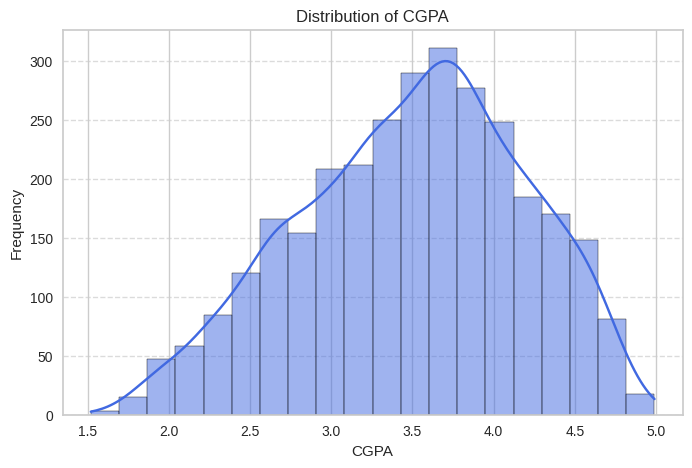

In [ ]:
# Visualisasi distribusi CGPA
plt.figure(figsize=(8, 5))
sns.histplot(data_df['CGPA'], bins=20, kde=True, color="royalblue")
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

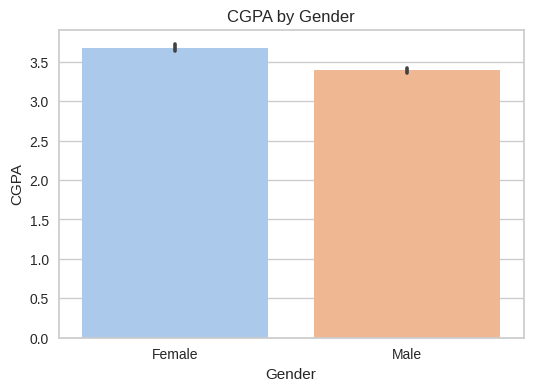

In [ ]:
# Visualisasi hubungan Gender dan CGPA
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='CGPA', data=data_df, palette="pastel")
plt.title('CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.show()

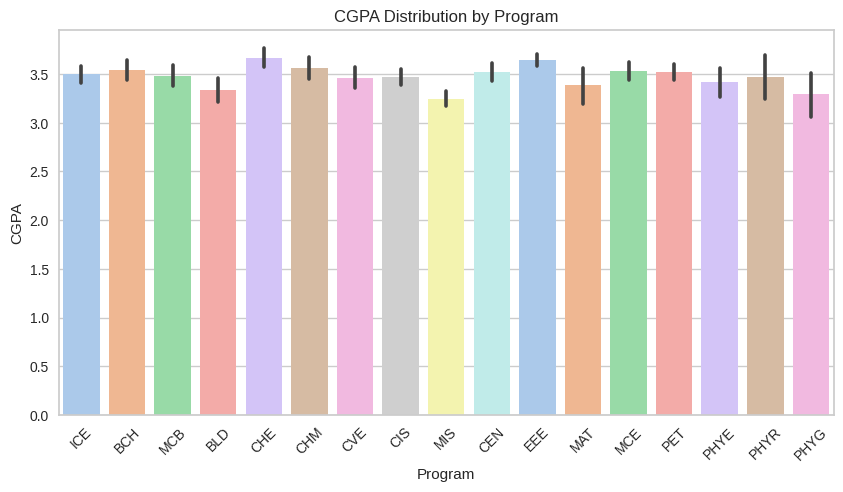

In [ ]:
# Visualisasi distribusi CGPA per Program Studi
plt.figure(figsize=(10, 5))
sns.barplot(x='Prog Code', y='CGPA', data=data_df, palette="pastel")
plt.title('CGPA Distribution by Program')
plt.xlabel('Program')
plt.ylabel('CGPA')
plt.xticks(rotation=45)
plt.show()

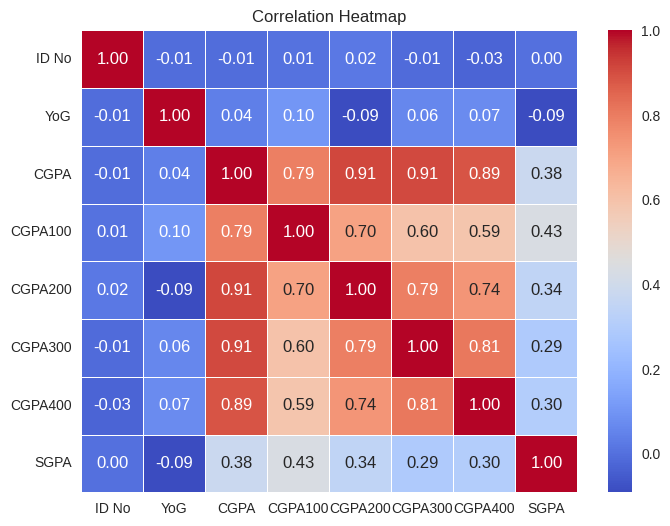

In [ ]:
# Korelasi antar variabel numerik
plt.figure(figsize=(8, 6))
numeric_cols = data_df.select_dtypes(include=['number']).columns
sns.heatmap(data_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Cek kembali missing values
data_df.isnull().sum()

,0
ID No,0
Prog Code,0
Gender,0
YoG,0
CGPA,0
CGPA100,0
CGPA200,0
CGPA300,0
CGPA400,0
SGPA,0


In [ ]:
# Mengisi data jika ada yang hilang
data_df[numeric_cols] = data_df[numeric_cols].fillna(data_df[numeric_cols].mean())

In [ ]:
# Mengecek jumlah duplikasi
duplicates_data = data_df.duplicated().sum()

In [ ]:
# Menghapus duplikasi jika ada
if duplicates_data > 0:
    data_df = data_df.drop_duplicates()

In [ ]:
# Identifikasi kolom kategorikal
categorical_cols = data_df.select_dtypes(include=['object']).columns
categorical_cols.tolist()

['Prog Code', 'Gender']

In [ ]:
# Encoding fitur kategorikal
label_encoder_gender = LabelEncoder()
label_encoder_prog = LabelEncoder()

data_df['Gender'] = label_encoder_gender.fit_transform(data_df['Gender'])
data_df['Prog Code'] = label_encoder_prog.fit_transform(data_df['Prog Code'])

In [ ]:
# Cek kembali dataset setelah encoding
display(data_df.head(10))

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,8,0,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,0,0,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,0,1,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,0,1,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,0,0,2010,3.88,3.61,3.69,3.63,4.58,4.24
5,51740,0,1,2010,2.97,2.66,2.98,3.28,3.07,3.13
6,76075,0,1,2010,3.34,3.68,3.00,3.44,3.28,3.02
7,60888,0,0,2010,2.56,2.30,2.50,2.29,2.77,2.68
8,43378,0,1,2010,3.76,3.30,3.64,3.88,4.37,3.13
9,80307,0,0,2010,3.96,3.94,3.89,3.81,4.17,3.98


In [ ]:
# Normalisasi menggunakan Min-Max Scalling
scaler = MinMaxScaler()
data_df[numeric_cols] = scaler.fit_transform(data_df[numeric_cols])

In [ ]:
# Cek data setelah normalisasi
display(data_df.head(10))

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,0.254329,8,0,0.0,0.492795,0.381924,0.603133,0.455378,0.580,0.481268
1,0.641233,0,0,0.0,0.593660,0.489796,0.806789,0.627002,0.694,0.449568
2,0.109850,0,1,0.0,0.198847,0.061224,0.211488,0.196796,0.502,0.210375
3,0.544999,0,1,0.0,0.340058,0.320700,0.331593,0.313501,0.470,0.498559
4,0.090363,0,0,0.0,0.680115,0.594752,0.657963,0.686499,0.916,0.801153
5,0.381614,0,1,0.0,0.417867,0.317784,0.472585,0.606407,0.614,0.481268
6,0.710017,0,1,0.0,0.524496,0.615160,0.477807,0.643021,0.656,0.449568
7,0.505067,0,0,0.0,0.299712,0.212828,0.347258,0.379863,0.554,0.351585
8,0.268768,0,1,0.0,0.645533,0.504373,0.644909,0.743707,0.874,0.481268
9,0.767129,0,0,0.0,0.703170,0.690962,0.710183,0.727689,0.834,0.726225


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Menghapus outlier dengan IQR
def remove_outliers_iqr(data_df, columns):
  Q1 = data_df[columns].quantile(0.25)
  Q3 = data_df[columns].quantile(0.75)
  IQR = Q3 - Q1
  mask = ~((data_df[columns] < (Q1 - 1.5 * IQR)) | (data_df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
  return data_df.loc[mask], mask

In [ ]:
# Hapus outlier dari dataset sebelum clustering
X, mask = remove_outliers_iqr(X, X.columns)
y = y.loc[mask.index]

NameError: name 'X' is not defined

In [ ]:
# Feature selection dengan SelectKBest
k_best = 5
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Fitur yang dipilih:", selected_features.tolist())

NameError: name 'X' is not defined

In [ ]:
# Evaluasi Silhouette Score sebelum & sesudah Feature Selection
def evaluate_clustering(X, cluster_range):
  scores = {}
  for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores[k] = score
    print(f"K={k}, Silhouette Score: {score:.4f}")
  return scores

In [ ]:
# Evaluasi sebelum feature selection
score_before = evaluate_clustering(X, range(2, 10))

NameError: name 'X' is not defined

In [ ]:
# Evaluasi setelah feature selection
score_after = evaluate_clustering(X_selected, range(2, 10))

NameError: name 'X_selected' is not defined

In [ ]:
# Fitur untuk clustering
X_selected = data_df[['CGPA', 'CGPA300', 'SGPA', 'Gender', 'Prog Code']]

In [ ]:
# Melatih model clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_selected)

KMeans(n_clusters=5, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Menentukan jumlah klaster optimal
optimal_k = max(score_after, key=score_after.get)
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_optimal = kmeans_optimal.fit_predict(X_selected)
silhouette_optimal = silhouette_score(X_selected, labels_optimal)
print(f"Jumlah klaster optimal: {optimal_k}")
print(f"Silhouette Score: {silhouette_optimal:.4f}")

NameError: name 'score_after' is not defined

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
correlation_matrix = data_df.corr()
correlated_features = correlation_matrix["CGPA"].abs().sort_values(ascending=False)
print(correlated_features)

CGPA         1.000000
CGPA200      0.910676
CGPA300      0.906560
CGPA400      0.886461
CGPA100      0.792364
SGPA         0.379805
Gender       0.200790
Prog Code    0.067910
YoG          0.040251
ID No        0.008673
Name: CGPA, dtype: float64


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

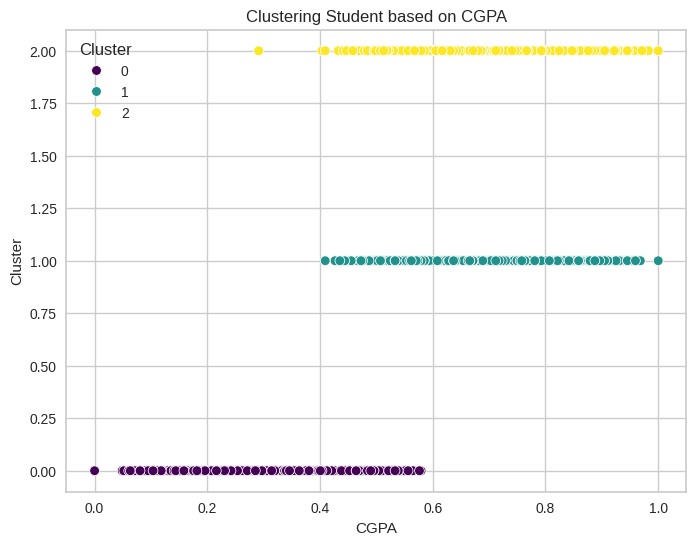

In [ ]:
#Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data_df["Cluster"] = kmeans.fit_predict(data_df[numeric_cols])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_df["CGPA"], y=data_df["Cluster"], hue=data_df["Cluster"], palette="viridis")
plt.title("Clustering Student based on CGPA")
plt.xlabel("CGPA")
plt.ylabel("Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Menambahkan label klaster ke dalam dataset asli
data_df['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Inverse transform untuk mengembalikan nilai kategorikal
data_df['Gender'] = label_encoder_gender.inverse_transform(data_df['Gender'])
data_df['Prog Code'] = label_encoder_prog.inverse_transform(data_df['Prog Code'])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Agregasi berdasarkan cluster
cluster_summary = data_df.groupby('Cluster').agg({
    'CGPA': ['mean', 'min', 'max'],
    'CGPA300': ['mean', 'min', 'max'],
    'SGPA': ['mean', 'min', 'max'],
    'Gender': lambda x: x.mode()[0],
    'Prog Code': lambda x: x.mode()[0]
})

print(cluster_summary)

             CGPA                       CGPA300                         SGPA  \
             mean       min       max      mean       min      max      mean   
Cluster                                                                        
0        0.351612  0.000000  0.579251  0.439521  0.000000  0.79405  0.401499   
1        0.693753  0.409222  1.000000  0.755320  0.345538  1.00000  0.539278   
2        0.677095  0.291066  1.000000  0.733240  0.249428  1.00000  0.498965   

                              Gender Prog Code  
              min       max <lambda>  <lambda>  
Cluster                                         
0        0.000000  0.841499     Male       MIS  
1        0.060519  1.000000     Male       EEE  
2        0.054755  0.985591     Male       EEE  


Tulis hasil interpretasinya di sini.
### 1. Cluster 0:
- Rata-rata CGPA: 0.5791 (Min: 0.0778, Max: 1.0000)
- Rata-rata CGPA300: 0.6461 (Min: 0.0778, Max: 1.0000)
- Rata-rata SGPA: 0.4699 (Min: 0.0749, Max: 1.0000)
- Gender dominan: Laki-laki
- Program dominan: Program 5

- **Analisis**: Cluster ini terdiri dari mahasiswa dengan **CGPA rata-rata yang cukup tinggi** dan performa akademik yang relatif stabil di semester 3 (CGPA300). Namun, SGPA mereka sedikit lebih rendah, yang mungkin menunjukkan adanya penurunan performa di semester terakhir. Mayoritas mahasiswa dalam cluster ini berasal dari **Program 5** dan didominasi oleh laki-laki.


### 2. Cluster 1:
- Rata-rata CGPA: 0.5376 (Min: 0.0000, Max: 0.9683)
- Rata-rata CGPA300: 0.6261 (Min: 0.0458, Max: 0.9954)
- Rata-rata SGPA: 0.4472 (Min: 0.0000, Max: 0.9164)
- Gender dominan: Laki-laki
- Program dominan: Program 12
- **Analisis**: Cluster ini terdiri dari mahasiswa dengan **CGPA yang lebih rendah dibanding cluster lain**, dan rentang nilainya lebih lebar (ada mahasiswa dengan CGPA mendekati nol). Hal ini menunjukkan bahwa kelompok ini memiliki performa akademik yang lebih beragam, dengan sebagian mahasiswa mungkin mengalami kesulitan dalam studi mereka. Sebagian besar berasal dari **Program 12** dan didominasi oleh laki-laki.

### 3. Cluster 2:
- Rata-rata CGPA: 0.5676 (Min: 0.0836, Max: 1.0000)
- Rata-rata CGPA300: 0.6398 (Min: 0.0000, Max: 1.0000)
- Rata-rata SGPA: 0.4796 (Min: 0.0029, Max: 0.9539)
- Gender dominan: Laki-laki
- Program dominan: Program 2
- **Analisis**: Mahasiswa dalam cluster ini memiliki **CGPA yang cukup baik**, dengan CGPA300 yang lebih tinggi, menunjukkan bahwa mereka berhasil mempertahankan atau meningkatkan performa akademik mereka di semester 3. SGPA mereka juga sedikit lebih baik dibanding cluster sebelumnya. Mahasiswa di cluster ini sebagian besar berasal dari **Program 2** dan mayoritas laki-laki.

### 4. Cluster 3:
- Rata-rata CGPA: 0.5910 (Min: 0.0605, Max: 0.9712)
- Rata-rata CGPA300: 0.6477 (Min: 0.0961, Max: 0.9954)
- Rata-rata SGPA: 0.5171 (Min: 0.0807, Max: 0.9856)
- Gender dominan: Laki-laki
- Program dominan: Program 7
- **Analisis**: Cluster ini menunjukkan mahasiswa dengan **CGPA tertinggi dibanding cluster lain**. Mereka memiliki **SGPA yang juga lebih tinggi**, yang menunjukkan bahwa mahasiswa dalam cluster ini cenderung memiliki kinerja akademik yang lebih stabil dan meningkat dari waktu ke waktu. Mahasiswa dalam kelompok ini sebagian besar berasal dari **Program 7*

### 5. Cluster 4:
- Rata-rata CGPA: 0.5611 (Min: 0.0807, Max: 0.9597)
- Rata-rata CGPA300: 0.6195 (Min: 0.1259, Max: 0.9680)
- Rata-rata SGPA: 0.4744 (Min: 0.0605, Max: 0.8847)
- Gender dominan: Laki-laki
- Program dominan: Program 13
- **Analisis**: Mahasiswa dalam cluster ini memiliki **CGPA yang cukup stabil** tetapi tidak setinggi cluster 3. Performa akademik mereka cenderung **sedikit menurun di semester terakhir** (SGPA lebih rendah dibanding CGPA300). Sebagian besar mahasiswa dalam kelompok ini berasal dari **Program 13**

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Gabungkan X dan y sebelum menyimpan
data_df_filtered = X.copy()
data_df_filtered["Target"] = y.values

# Simpan ke CSV
data_df_filtered.to_csv("filtered_data.csv", index=False)

NameError: name 'X' is not defined